# Analyseren van waterkwaliteitsdata uit CSV-bestanden

In dit notebook gaan we aan de slag met het ophalen van gegevens uit een CSV-bestand en het verwerken van deze data met behulp van de Pandas bibliotheek in Python. De data over oppervlakte water kwaliteit word geleverd in csv formaat. CSV-bestanden zijn een van de meest gebruikte formaten voor het opslaan van gestructureerde data, zoals tabellen met rijen en kolommen. Het doel van dit notebook is om je te laten zien hoe je deze data kunt inladen in een pandas dataframe, de gegevens kunt verkennen, en vervolgens enkele basisbewerkingen kunt uitvoeren om de data klaar te maken voor verdere analyse.

### 1. Installeren van benodigde bibliotheken
Zorg ervoor dat je de benodigde bibliotheek hebt geïnstalleerd. We maken gebruik van pandas en matplotlib. Je kunt het installeren met het volgende commando in een notebook-cel (als je het nog niet hebt geïnstalleerd):

In [ ]:
!pip install pandas matplotlib

### 2. Importeren van de bibliotheek
Importeer vervolgens de benodigde bibliotheken in je notebook:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

### 3. Data ophalen uit een CSV

Plaats het CSV-bestand vanuit Google Drive in de data-map, of maak direct verbinding met je Google Drive (Let op deze optie werkt alleen in google colab). Nu kun je een CSV-bestand inladen en omzetten naar een Pandas DataFrame. Gebruik de functie pd.read_csv() om de gegevens in te laden.

In [ ]:
# Optie voor connectie maken met google drive
from google.colab import drive
from pathlib import Path

drive.mount('/content/drive')      # grants notebook access to Drive
path = Path('/content/drive/MyDrive/Waternet/Hackathon')

In [3]:
from pathlib import Path
# Optie voor lokale folder
path = Path('../')

In [6]:
# Load a CSV file into a Pandas DataFrame
# Example path; you can also use another part of the Amstel or HyBio data
df = pd.read_csv(path / 'data/waternet FEWS data/FYCHEM_alleParamtrs_alleJaren_Amstelland_1900tmjuni.csv', delimiter=';', encoding='latin-1', low_memory=False)
# df = pd.read_csv('../data/HB_alleKwalelementen_alleJaren_Amstelland.csv', delimiter=',', encoding='latin-1')

# Convert the 'datum' column to datetime format
df['datum'] = pd.to_datetime(df['datum'])

# Convert the 'meetwaarde' column to a numeric value instead of a string
df['meetwaarde'] = pd.to_numeric(df['meetwaarde'], errors='coerce')

# View the first 5 rows of the DataFrame
df.head()

,monsterident,locatiecode,locatie namespace,locatie omschrijving,locatie x,locatie y,locatie z,locatie referentievlakzcoord,locatie KRW watertype,locatie EAG,...,fewsparametereenheidequivalent,fewsparametereenheidreferentie,fewsparameterparameterfractie,limietsymbool,meetwaarde,eenheid,waardebewerkingsmethode,kwaliteitsoordeelcode,afronding,opmerkingmeting
0,WN_FC1963060003,GWV006,NL11,Ringvaart bij Ringdijk 2,122157,467720,NaN,NaN,M10,2500-EAG-1,...,NaN,NaN,NaN,NaN,138.00,mg/l,MET,0,Ja,NaN
1,WN_FC1963060004,PGM002,NL11,"Hoofdtocht Botsholse dw.weg, mp macrofauna",121985,472991,NaN,NaN,M10,2540-EAG-1,...,NaN,NaN,NaN,NaN,1019.00,mg/l,MET,0,Ja,NaN
2,WN_FC1963060003,GWV006,NL11,Ringvaart bij Ringdijk 2,122157,467720,NaN,NaN,M10,2500-EAG-1,...,N,NaN,nf,NaN,3.11,mg/l,MET,0,Ja,NaN
3,WN_FC1963060004,PGM002,NL11,"Hoofdtocht Botsholse dw.weg, mp macrofauna",121985,472991,NaN,NaN,M10,2540-EAG-1,...,N,NaN,nf,NaN,4.67,mg/l,MET,0,Ja,NaN
4,WN_FC1963060003,GWV006,NL11,Ringvaart bij Ringdijk 2,122157,467720,NaN,NaN,M10,2500-EAG-1,...,P,NaN,nf,NaN,0.16,mg/l,MET,0,Ja,NaN


### 4. Informatie over de dataframe
Het is handig om wat basisinformatie te verkrijgen over het DataFrame, zoals het aantal rijen en kolommen, en de datatypes van de kolommen. Dit kan gedaan worden met de .info() methode:

In [ ]:
df.info()

Voor de "FyChem data" zijn de belangrijkste kolommen: fewsparametercode en meetwaarde.
Voordat we inhoudelijk naar de metingen zelf gaan kijken, is het belangrijk om eerst een overzicht te krijgen van welke parameters er in de dataset zitten.

Elke meting heeft een parametercode, bijvoorbeeld ECOLI of PH, en een bijbehorende beschrijvende naam, zoals Escherichia coli of pH. Soms worden dezelfde codes gebruikt op verschillende plekken of in verschillende projecten, dus het is nuttig om deze codes te koppelen aan hun betekenis.

Daarom maken we hieronder een overzicht van alle unieke combinaties van parametercode en beschrijvende naam (fewsparameternaam) die in de dataset voorkomen.

In [10]:
df.groupby('fewsparametercode')['fewsparameternaam'].unique().reset_index()

,fewsparametercode,fewsparameternaam
0,111TClC2a,"[1,1,1-trichloorethaan (ug/l)]"
1,1122T4ClC2a,"[1,1,2,2-tetrachloorethaan (ug/l)]"
2,112TClC2a,"[1,1,2-trichloorethaan (ug/l)]"
3,11ClPF3OUdS,[11ClPF3OUdS_ng/l]
4,11DClC2a,"[1,1-dichloorethaan (ug/l)]"
5,11DClC2e,"[1,1-dichlooretheen (ug/l)]"
6,1234T4C1yBen,[tetramethylbenzeen (ug/l)]
7,1234T4ClBen,"[1,2,3,4-tetrachloorbenzeen (ug/l)]"
8,1235T4ClBen,"[1,2,3,5-tetrachloorbenzeen (ug/l)]"
9,123TC1yBen,"[1,2,3-trimethylbenzeen (ug/l)]"


Voor de "HyBio data" zijn de belangrijkste kolommen: WNA nederlandse soortnaam, lengteklasse en meetwaarde.
Onderstaande kan je uitvoeren om te zien welke soorten er zijn gevangen/gemeten en onder welke klasses.

In [17]:
df.groupby("WNA nederlandse soortnaam")["lengteklasse"].unique()

WNA nederlandse soortnaam
Aal                [VL-060cm, VL-040cm, VL-048cm, VL-041cm, VL-04...
Aalbes                                                         [nan]
Aardbeiklaver                                                  [nan]
Aarmunt                                                        [nan]
Aarvederkruid                                                  [nan]
                                         ...                        
Zwanenbloem                                                    [nan]
Zwart tandzaad                                                 [nan]
Zwartbekgrondel    [VL-008cm, VL-009cm, VL-012cm, VL-002cm, VL-00...
Zwarte els                                                     [nan]
Zwarte zegge                                                   [nan]
Name: lengteklasse, Length: 555, dtype: object

### 5. Inzichtelijk maken data (grafieken)
Om patronen, trends of uitschieters in onze waterkwaliteitsdata beter te begrijpen, is het vaak nuttig om de gegevens visueel weer te geven. Grafieken maken data in één oogopslag leesbaar en helpen bij het opsporen van opvallende of afwijkende metingen.

We gebruiken hiervoor matplotlib, een veelgebruikte Python-bibliotheek voor datavisualisatie. Denk bijvoorbeeld aan tijdreeksen van een parameter, of een vergelijking tussen meetlocaties.

Hieronder laten we een eenvoudig voorbeeld zien van hoe je een grafiek maakt van een parameter in de tijd.

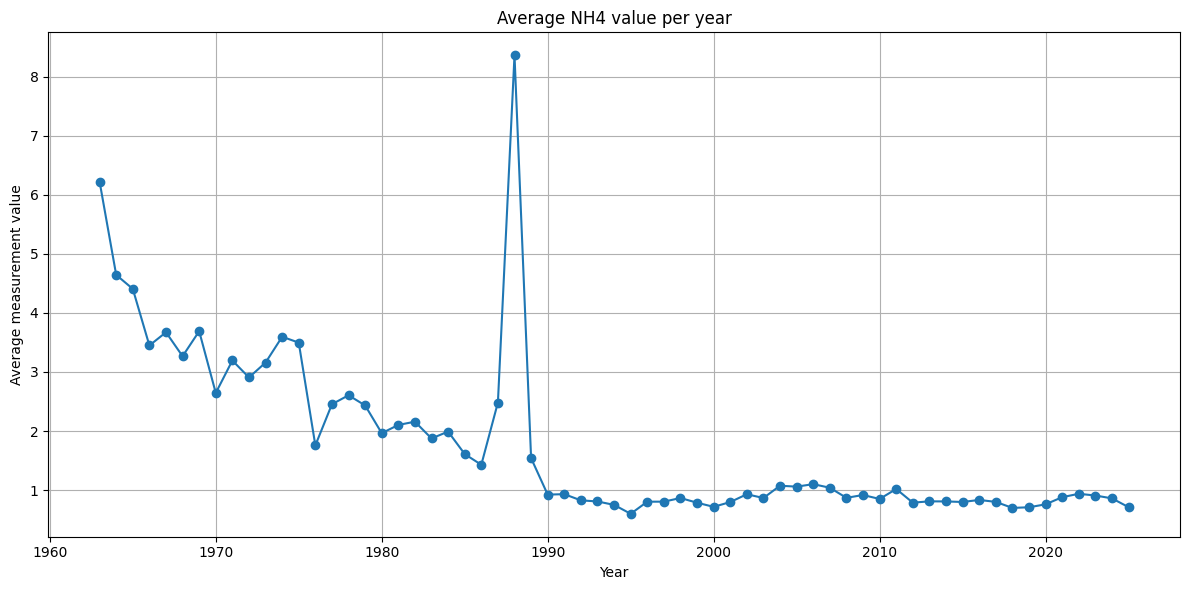

In [23]:
parametercode = "NH4"

# Ensure 'datum' is a datetime object
plot_data = df[df['fewsparametercode'] == parametercode].copy()
plot_data['datum'] = pd.to_datetime(plot_data['datum'])
plot_data.set_index('datum', inplace=True)

# Group by year and calculate the average
yearly_data = plot_data.resample('YE').mean(numeric_only=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index.year, yearly_data['meetwaarde'], marker='o', linestyle='-')
plt.title(f'Average {parametercode} value per year')
plt.xlabel('Year')
plt.ylabel('Average measurement value')
plt.grid(True)
plt.tight_layout()
plt.show()


### 6. Ga nu zelf aan de slag 
Nu je hebt gezien hoe je de meetgegevens uit CSV-bestanden kunt inladen, verkennen en visualiseren, is het tijd om zelf aan de slag te gaan met de data!

Probeer bijvoorbeeld eens het volgende:

- Filter de data op een andere parameter (zoals ECOLI, NO3, of TURB).
- Maak een grafiek van de meetwaarden over de tijd per locatie.
- Zoek uit welke parameters het vaakst gemeten worden.
- Vergelijk waarden tussen locaties of maanden.
- Bekijk uitschieters of trends in specifieke periodes en zoek uit hoe dit komt (bijv. van het internet).
- Vul missende waardes in.
- Voorspel missende waardes of waardes in de toekomst (een veelgebruikte library hiervoor is sklearn).
    - lineair regression
    - random forest 
    - etc...
- Kijk naar Waterkwantiteit data.
- Koppel x en y coordinaten aan een kaart (https://rijksdriehoekscoordinaten.nl).
- koppel kaart data aan de waterkwantiteit data.

En denk na over jouw slimme oplossing om de Amstel een stem te geven!